# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.


### 1. Get the data

We are using the `marketing_customer_analysis.csv` file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 2. Dealing with the data

Already done in the round 2.

In [2]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
def clean_dfheaders(df):
    df.rename(columns={'Customer':'id', 'EmploymentStatus':'employment_status'}, inplace=True)
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    return df

# using the 2 operations together only works when removing the 'df=' infront of the first satemment. Why?
# the first operation doesnt work at all in a function without the inplace parameter. Outside of a function it does work. Why?

clean_dfheaders(data)

,id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 3. Explore the data

Some datasets have values that are missing, invalid, or otherwise difficult for an algorithm to process. If data is missing, the algorithm can’t use it. If data is invalid, the algorithm produces less accurate or even misleading outcomes. Some datasets are relatively clean but need to be shaped (e.g., aggregated or pivoted) and many datasets are just lacking useful business context (e.g., poorly defined ID values), hence the need for feature enrichment. Good data preparation produces clean and well-curated data which leads to more practical, accurate model outcomes.


   **3.1.- Determine the problems**
    
   **3.2.- Data cleaning** Cleaning the data is very important as the model learning from that data only, so if we feed inconsistent, appropriate data to model it will return garbage only, so it is required to make sure that the data does not contains any unseen problem.
     
       - Feature and Target Variables
       - Data Types
       - Missing data, check null values
       - Outliers
       - Duplicate data
        
   **3.3.- Feature selection** (Which variables are important to answer our questions?)
    
   **3.4.- Data transformation**

In [4]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')

In [5]:
# No Nan values to take care of anymore, so checking if there are values  <= 0 in the numerical columns and replaceing them where it makes sense
number_col = list(data.select_dtypes(include=[np.number]).columns.values)

for col in number_col:
    neg_val = len(data[data[col] < 0])
    zero_val = len(data[data[col] == 0])
     
    if neg_val > 0:
        print('Negative values in', col, ':', neg_val)
    elif zero_val > 0:
        print('Zeros in', col, ':', zero_val)
    else:
        print('Column', col, 'is ok.')

Column customer_lifetime_value is ok.
Zeros in income : 2317
Column monthly_premium_auto is ok.
Zeros in months_since_last_claim : 314
Zeros in months_since_policy_inception : 83
Zeros in number_of_open_complaints : 7252
Column number_of_policies is ok.
Column total_claim_amount is ok.


In [6]:
# replacing 0 only makes sense in 'income'
data1 = data.copy()
data1['income'] = np.where(data['income'] == 0, data['income'].median(), data['income'])

In [7]:
data1.duplicated(subset=['id']).unique()

array([False])

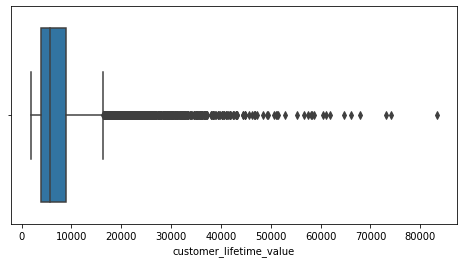

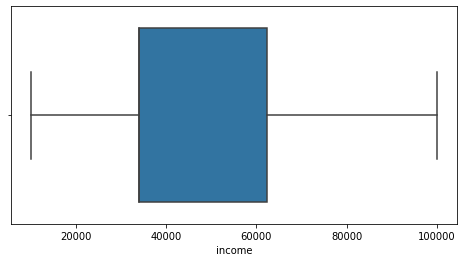

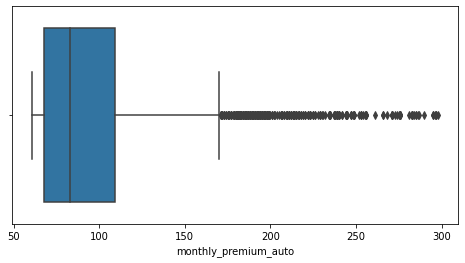

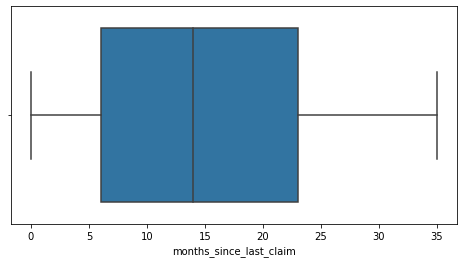

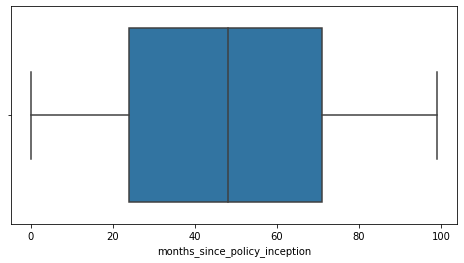

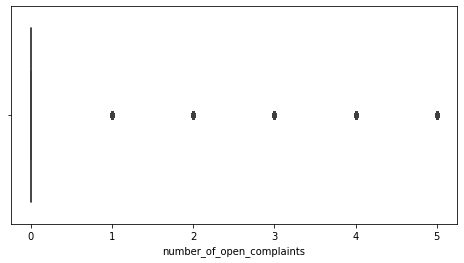

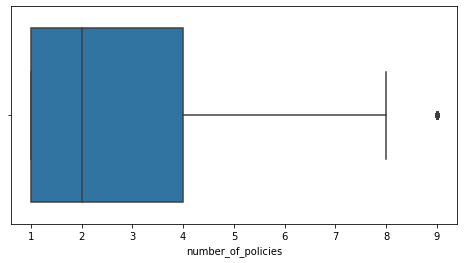

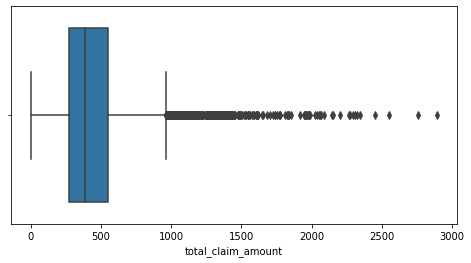

In [8]:
num_col = list(data1.select_dtypes(include=[np.number]).columns.values)

for col in num_col:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data1[col])
    plt.show()

In [9]:
# removing outliers where it makes sense
outl_col = ['customer_lifetime_value', 'monthly_premium_auto', 'number_of_policies', 'total_claim_amount']

for col in outl_col:
    iqr = np.percentile(data1[col],75) - np.percentile(data1[col],25)
    upper_limit = np.percentile(data1[col],75) + 1.5*iqr
    lower_limit = np.percentile(data1[col],25) - 1.5*iqr
    data1.loc[data1[col] > upper_limit, col] = upper_limit
    data1.loc[data1[col] < lower_limit, col] = lower_limit

In [10]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,7185.701022,4234.107132,1898.007675,3994.251794,5780.182197,8962.167041,16414.039912
income,9134.0,46254.048664,22200.666227,10037.000000,33889.500000,33893.250000,62320.000000,99981.000000
monthly_premium_auto,9134.0,91.494635,28.416268,61.000000,68.000000,83.000000,109.000000,170.500000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.943398,2.334310,1.000000,1.000000,2.000000,4.000000,8.500000
total_claim_amount,9134.0,418.322158,240.254253,0.099007,272.258244,383.945434,547.514839,960.399730


In [11]:
data1_corr = data1.corr()
data1_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.018463,0.437610,0.007527,-0.002747,-0.044164,0.111920,0.225322
income,0.018463,1.000000,-0.013476,-0.030895,0.008274,0.011959,-0.004384,-0.292297
monthly_premium_auto,0.437610,-0.013476,1.000000,-0.000731,0.018061,-0.014048,-0.013378,0.573757
months_since_last_claim,0.007527,-0.030895,-0.000731,1.000000,-0.042959,0.005354,0.009691,-0.000303
months_since_policy_inception,-0.002747,0.008274,0.018061,-0.042959,1.000000,-0.001158,-0.013037,-0.006362
number_of_open_complaints,-0.044164,0.011959,-0.014048,0.005354,-0.001158,1.000000,0.001867,-0.016279
number_of_policies,0.111920,-0.004384,-0.013378,0.009691,-0.013037,0.001867,1.000000,-0.003138
total_claim_amount,0.225322,-0.292297,0.573757,-0.000303,-0.006362,-0.016279,-0.003138,1.000000


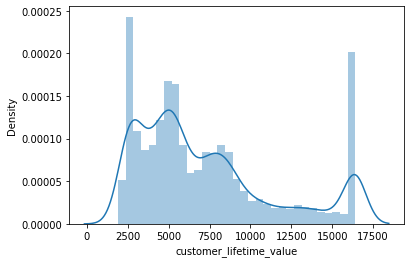

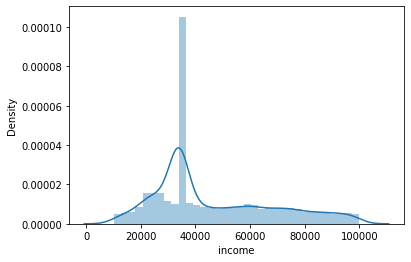

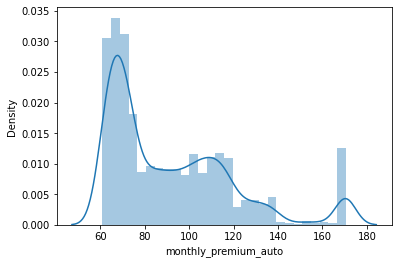

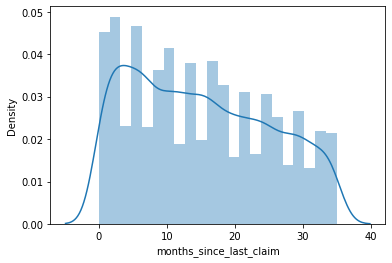

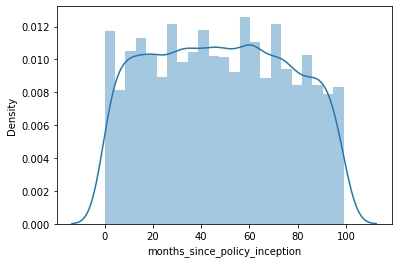

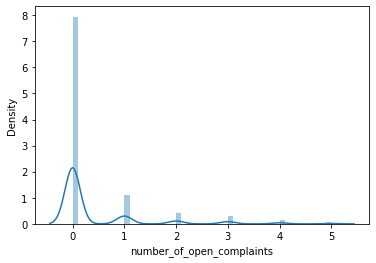

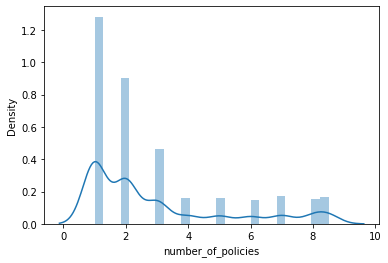

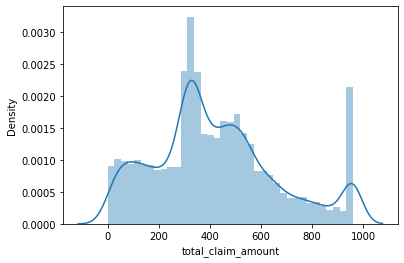

In [12]:
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.distplot(data1[col])
    plt.show()

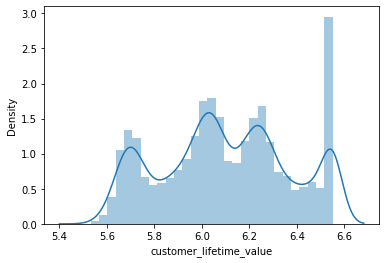

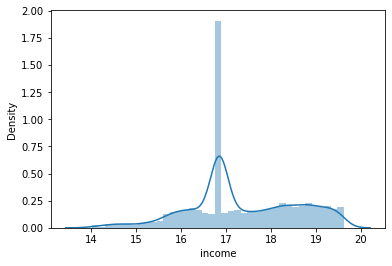

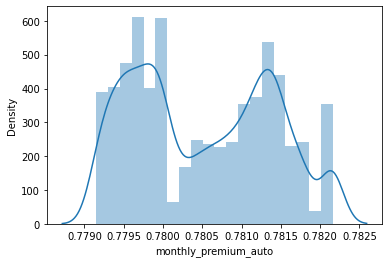

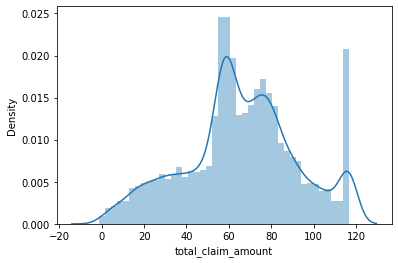

In [13]:
#no column is really promisssing, evaluated by looking at correlations with monthly_premium_auto being the best among them
#insted of caping outliers, try assining mean/median for colomuns where caping creates a high occurance of the cap values
#transforming except for 'number_of_open_complaints' and 'number_of_policies' because they sem to trend towards certain values which I dont want to lose by transforming and normalizing

data_t = data1.copy()
trans_col = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']
#data_t['months_since_policy_inception'] = np.where(data_t['months_since_policy_inception']<=0, 0.1, data_t['months_since_policy_inception']) doesnt work. Why?

for col in trans_col:
    transformed_col, _ci = stats.boxcox(data1[col])
    data_t[col] = transformed_col
    plt.figure(figsize=(6,4))
    sns.distplot(data_t[col])
    plt.show()

In [14]:
data_t_corr = data_t.corr()
data_t_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.029484,0.461436,0.007867,-0.002863,-0.046241,0.258843,0.208346
income,0.029484,1.000000,-0.008345,-0.028703,0.013141,0.017321,-0.004681,-0.287149
monthly_premium_auto,0.461436,-0.008345,1.000000,-0.003115,0.015037,-0.015676,-0.009143,0.492940
months_since_last_claim,0.007867,-0.028703,-0.003115,1.000000,-0.042959,0.005354,0.009691,-0.004316
months_since_policy_inception,-0.002863,0.013141,0.015037,-0.042959,1.000000,-0.001158,-0.013037,-0.006603
number_of_open_complaints,-0.046241,0.017321,-0.015676,0.005354,-0.001158,1.000000,0.001867,-0.014127
number_of_policies,0.258843,-0.004681,-0.009143,0.009691,-0.013037,0.001867,1.000000,-0.001744
total_claim_amount,0.208346,-0.287149,0.492940,-0.004316,-0.006603,-0.014127,-0.001744,1.000000


In [15]:
#since correlation for monthly_premium_auto decreased after transforming the column, I'm using the original data instead
data_t['monthly_premium_auto'] = data1['monthly_premium_auto']
data_t['total_claim_amount'] = data1['total_claim_amount']

### 4. Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).

In [16]:
# Model before normalizing and standardizing
t_num = list(data_t.select_dtypes(include=[np.number]).columns.values)
t_object = list(data_t.select_dtypes(include=[np.object]).columns.values)

t_drop = t_object + [t_num[7]] + ['effective_to_date']
t_x = data_t.drop(t_drop, axis=1)
t_y = data_t['total_claim_amount']

lm = LinearRegression()
model2 = lm.fit(t_x,t_y)
t_predictions = lm.predict(t_x)
t_rmse = mean_squared_error(t_y, t_predictions, squared=False)

print("R2_score:", round(lm.score(t_x,t_y),2))
print("RMSE:", t_rmse)

t_x = sm.add_constant(t_x)
model = sm.OLS(t_y,t_x).fit()

print(model.summary())

R2_score: 0.4
RMSE: 185.56573612420834
                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     881.4
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:05:47   Log-Likelihood:                -60671.
No. Observations:                9134   AIC:                         1.214e+05
Df Residuals:                    9126   BIC:                         1.214e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [17]:
y = data_t['total_claim_amount']
x = data_t.drop(['total_claim_amount'], axis=1)
data_sn = x.select_dtypes(include=np.number)

transformer = Normalizer()
transformer.fit(data_sn)
x_normalized = transformer.transform(data_sn)
data_sn = pd.DataFrame(x_normalized)

transformer = StandardScaler()
transformer.fit(data_sn)
x_standardized = transformer.transform(data_sn)
data_sn = pd.DataFrame(x_standardized)

sn_col = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']

for idx, col in enumerate(sn_col):
    data_sn.rename(columns={idx:col}, inplace=True)

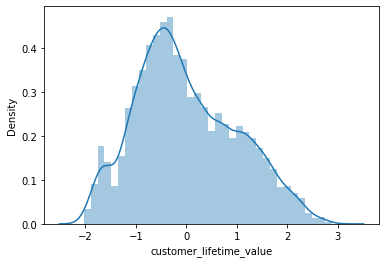

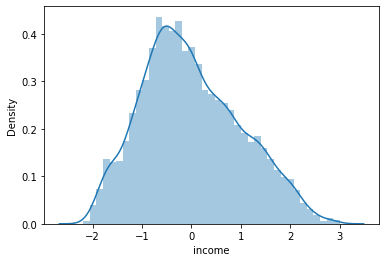

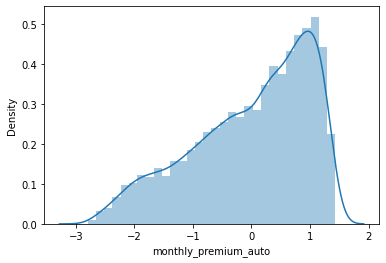

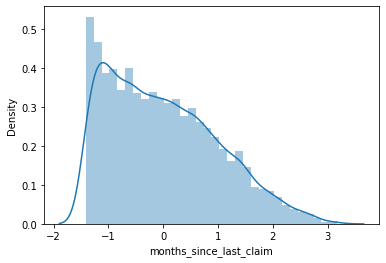

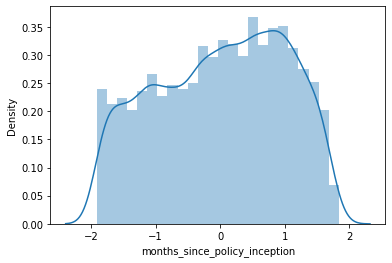

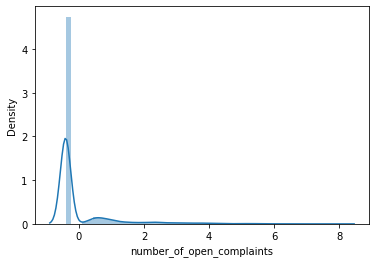

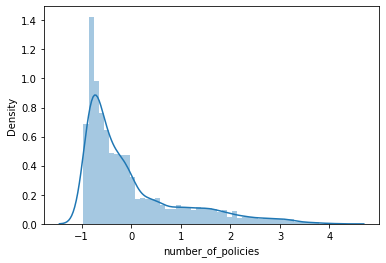

In [18]:
for col in sn_col:
    plt.figure(figsize=(6,4))
    sns.distplot(data_sn[col])
    plt.show()

In [19]:
# Model after normalizing and standardizing
sn_x = data_sn
sn_y = data_t['total_claim_amount']

lm_sn = LinearRegression()
model_sn2 = lm_sn.fit(sn_x,sn_y)
sn_predictions = lm_sn.predict(sn_x)
sn_rmse = mean_squared_error(sn_y, sn_predictions, squared=False)

print("R2_score:", round(lm_sn.score(sn_x,sn_y),2))
print("RMSE:", sn_rmse)

sn_x = sm.add_constant(sn_x)
model_sn = sm.OLS(sn_y,sn_x).fit()

print(model_sn.summary())

R2_score: 0.36
RMSE: 191.91256270090648
                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     739.3
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:05:58   Log-Likelihood:                -60978.
No. Observations:                9134   AIC:                         1.220e+05
Df Residuals:                    9126   BIC:                         1.220e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------